# Лабораторная работа 11. Многозадачность: процессы и потоки.

Многозадачность (параллельность исполнения) - расщепление последовательности выполнения программы на несколько самостоятельных (возможно со своими локальными переменными, стеками и т.п.) подпрограмм, выполняющих каждый свою задачу и не отвлекающихся на то, как реализованы решения смежных задач, и выполнение этих подпрограмм одновременно (в каком-то смысле).

Подходы к реализации:

- процессы - каждая задача выполняется в своём изолированном процессе естественно, многозадачность вытесняющая, изоляция означает и большую надёжность, и меньшие возможности по взаимодействию; 

- потоки - каждая задача выполняется в своём потоке ОС или виртуальной машины, распределение по ядрам и переключения внезапные (вытесняющая многозадачность), но все задачи существуют в едином пространстве и могут обмениваться данными через общую память;

- сопрограммы - фрагменты задач поочерёдно выполняются в рамках одного и того же потока, переключения явные (кооперативная многозадачность).

# 1. Процессы

Ветвление процессов является традиционным способом организации параллельных вычислений и представляет собой фундаментальную
часть инструментального набора Unix. Ветвление процессов – это самый простой способ запуска независимых программ, как отличных, так и не отличных от вызывающей программы.

После операции ветвления исходный экземпляр программы называется родительским процессом, а копия, созданная с помощью функции os.fork, называется дочерним процессом. Вообще говоря, родитель может воспроизвести любое число потомков, а потомки могут создать собственные дочерние процессы – все ответвленные процессы выполняются независимо и параллельно под управлением операционной системы, и дочерние процессы могут продолжать выполняться даже после завершения родительского процесса.

Поскольку эта функция создает копию вызывающей программы, она возвращает различные значения в каждой копии: ноль – в дочернем процессе и числовой идентификатор ID процесса нового потомка – в родительском процессе.

Поскольку ветвление процессов является частью модели программирования в Unix, этот сценарий замечательно будет функционировать в Unix, Linux и в современных версиях Mac OS. К сожалению, этот сценарий не будет работать под управлением стандартной версии Python в Windows, потому что функция fork не стыкуется с моделью Windows. 

Тем не менее в Windows сценарии на языке Python всегда могут порождать потоки выполнения, а также использовать пакет multiprocessing. Этот модуль обеспечивает альтернативный и переносимый способ запуска процессов. Другим вариантом является использование Python вместе с системами типа Cygwin, обеспечивающих полную Unix-подобную функциональность для Windows.

Для работы с библиотекой multiprocessing и запуска параллельных процессов можно использовать среду PyCharm (https://www.jetbrains.com/ru-ru/pycharm/download/#section=windows).

# multiprocessing 


(https://docs.python.org/3/library/multiprocessing.html)

In [1]:
import multiprocessing

multiprocessing.cpu_count()

20

Процесс как поток и взаимодействие порождающих и порождаемых потоков.

In [2]:
# import multiprocessing

import multiprocessing.dummy as multiprocessing
from os import getpid
import time

def clock(interval):
    n=10
    while bool(n):
        print(n, " I'm process", getpid(), 'The time is %s' % time.ctime())
        time.sleep(interval)
        n-=1

if __name__ == '__main__':
    p = multiprocessing.Process(target=clock, args=(2,))
    print('start')
    p.start()
    p.join(10)
    print('end')

start
10  I'm process 9480 The time is Sat Oct 31 12:37:42 2020
9  I'm process 9480 The time is Sat Oct 31 12:37:44 2020
8  I'm process 9480 The time is Sat Oct 31 12:37:46 2020
7  I'm process 9480 The time is Sat Oct 31 12:37:48 2020
6  I'm process 9480 The time is Sat Oct 31 12:37:50 2020
end
5  I'm process 9480 The time is Sat Oct 31 12:37:52 2020
4  I'm process 9480 The time is Sat Oct 31 12:37:54 2020
3  I'm process 9480 The time is Sat Oct 31 12:37:56 2020
2  I'm process 9480 The time is Sat Oct 31 12:37:58 2020
1  I'm process 9480 The time is Sat Oct 31 12:38:00 2020


In [3]:
print(" I'm PROCESS", getpid(),'hahaha!!!')

 I'm PROCESS 9480 hahaha!!!


# Пулы процессов

Пусть есть три функции a, b ,c: 

In [4]:
def a(x):
    time.sleep(x)
    print('a выполнен')
    return 'a'
def b(x):
    time.sleep(x)
    print('b выполнен')    
    return 'b'
def c(x):
    time.sleep(x)
    print('c выполнен')    
    return 'c'

Их необходимо вызвать в отдельных потоках (процессах), дождаться результата их выполнения и выдать ответ.

In [5]:
if __name__ == '__main__':

    time_a = 4
    time_b = 2
    time_c = 1

    t0 = time.time()

    p = multiprocessing.Pool()

    results = p.map(lambda fx: fx[0](fx[1]),[[a,time_a],[b,time_b],[c,time_c]])
    print(results)
    p.close()
    p.join()

    print(time.time() - t0)

c выполнен
b выполнен
a выполнен
['a', 'b', 'c']
4.049452781677246


Их необходимо вызвать в отдельных потоках (процессах), и спустя некоторое время проверить, завершились они или нет, выдать результат.

In [6]:
time_a = 2
time_b = 4
time_c = 1

p = multiprocessing.Pool()

results = p.map_async(lambda fx: fx[0](fx[1]),[[a,time_a],[b,time_b],[c,time_c]])

TIMEOUT = 3
print(results.get(TIMEOUT))

p.close()
p.join()

c выполнен
a выполнен


TimeoutError: 

b выполнен


Если все процессы успевают закончится за время TIMEOUT, то результат выполнения такой же, как и в предыдущем случае, но если хоть одна из процедур не успевает завершится, выдается исключение TimeoutError. 

Их необходимо вызвать в отдельных потоках (процессах), дождаться результата функции a, выдать результат.

In [7]:
time_a = 3
time_b = 6
time_c = 1

t0 = time.time()

p = multiprocessing.Pool()

results=[]
for r in p.imap(lambda fx: fx[0](fx[1]),[[a,time_a],[b,time_b],[c,time_c]]):
     results.append(r)
     break

print(results)
p.close()
p.join()

print(time.time() - t0)

c выполнен
a выполнен
['a']
b выполнен
6.049528360366821


Как видно, хотя отработали 2 функции из 3, результат мы получили только для приоритетной. Чтобы получить результаты всех выполенных следует использовать imap_unordered:

Вариант с синхронизацией.

In [9]:
time_a = 2
time_b = 5
time_c = 1

t0 = time.time()

p = multiprocessing.Pool()

results=[]

for r  in p.imap_unordered(lambda fx: fx[0](fx[1]),[[a,time_a],[b,time_b],[c,time_c]]):
    results.append(r)
    if  r =='a':
        break
        
print(results)
p.close()
p.join()       
        
print(time.time() - t0)

c выполнен
a выполнен
['c', 'a']
b выполнен
5.100900173187256


Вариант без синхронизации.

In [10]:
time_a = 2
time_b = 5
time_c = 1

t0 = time.time()

p = multiprocessing.Pool()

results=[]

for r  in p.imap_unordered(lambda fx: fx[0](fx[1]),[[a,time_a],[b,time_b],[c,time_c]]):
    results.append(r)
    if  r =='a':
        break
        
print(results)
#p.close()
#p.join()       
        
print(time.time() - t0)

c выполнен
a выполнен
['c', 'a']
2.016601085662842


# Ручной пул.

In [11]:
def doubler(number, index):
    result = number * 2
    proc = getpid()
    print('%i doubled to %i by process id: %i and thread %i, ' %(number, result, proc, index))
    time.sleep(0.1)

In [12]:
t0 = time.time()
    
numbers = [5, 10, 15, 20, 25]
procs = []
    
for index, number in enumerate(numbers):
    proc = multiprocessing.Process(target=doubler, args=(number,index,))
    procs.append(proc)
    proc.start()
    
for proc in procs:
    proc.join()
    
print(time.time() - t0)

5 doubled to 10 by process id: 14944 and thread 0, 
10 doubled to 20 by process id: 14944 and thread 1, 
15 doubled to 30 by process id: 14944 and thread 2, 
20 doubled to 40 by process id: 14944 and thread 3, 
25 doubled to 50 by process id: 14944 and thread 4, 
0.12149715423583984


In [13]:
t0 = time.time()

for index, number in enumerate(numbers):
    doubler(number, index)
    
print(time.time() - t0)

5 doubled to 10 by process id: 14944 and thread 0, 
10 doubled to 20 by process id: 14944 and thread 1, 
15 doubled to 30 by process id: 14944 and thread 2, 
20 doubled to 40 by process id: 14944 and thread 3, 
25 doubled to 50 by process id: 14944 and thread 4, 
0.5442848205566406
b выполнен


# 2. Потоки

Возьмём рекурсивную функцию для вычисления факториала:

In [9]:
threadId = 1
 
def factorial(n):
    global threadId
    if n < 1:                                        # тривиальный случай
        print("%s: %d" % ("Нить", threadId))
        threadId += 1
        return 1
    else:
        returnNumber = n * factorial(n - 1)          # рекурсивный вызов
        print(str(n) + '! = ' + str(returnNumber))
        return returnNumber

In [10]:
factorial(5)

Нить: 1
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120


120

Вызов функции факториала с помощью thread:

In [11]:
from threading import Thread 

thread1 = Thread(target=factorial, args=(4,))
thread2 = Thread(target=factorial, args=(5,))

thread1.start()
thread2.start()
thread1.join()
thread2.join()

Нить: 2
1! = 1
2! = 2
3! = 6
4! = 24
Нить: 3
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120


Пул потоков (concurrent.futures.Future):

In [12]:
from concurrent.futures import ThreadPoolExecutor, as_completed

with ThreadPoolExecutor(max_workers=3) as pool:
    
    results = [pool.submit(factorial, i) for i in range(10)]
    
    for future in as_completed(results):
        print(future.result())

Нить: 4
Нить: 5
1! = 1
Нить: 6
1! = 1
2! = 2
1Нить: 7
1! = 1
2! = 2
3! = 6
Нить: 8
1! = 1
2! = 2
3! = 6
4! = 24
Нить: 9
1! = 1
2! = 2

Нить: 10
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
Нить: 11
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
Нить: 12
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
Нить: 13
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
9! = 362880
3! = 6
4! = 24
5! = 120
2
1
6
24
720
5040
40320
362880
120


В многопоточной программе доступ к объектам иногда нужно синхронизировать. Часто для синхронизации потоков используют блокировки. Любые блокировки замедляют выполнение программы. Лучше избегать использование блокировок и отдавать предпочтение обмену данными через очереди.

# Упражнение 1. Сложение многоразрядных чисел.

Рассмотрим программу для сложения чисел произвольной длинны, заданных в символьном виде:

In [32]:
def add_multinumbers(a, b, r=0):
    c = ''
    n = min(len(a), len(b))
    for i in range(-1,-n-1,-1):
        d = int(a[i]) + int(b[i]) + r
        c = str(d%10)+c
        r = d//10
        
    if len(a) > n:       
        while r>0 and len(a)+i>0:
            i=i-1
            d = int(a[i]) + r
            c = str(d%10)+c
            r = d//10        
        c=a[:len(a)+i]+c
        
    elif len(b) > n:       
        while r>0 and len(b)+i>0:
            i=i-1
            d = int(b[i]) + r
            c = str(d%10)+c
            r = d//10        
        c=b[:len(b)+i]+c       
    c = str(r)+c   
    return c

In [33]:
a = '6934317835'
b = '3221643577'
add_multinumbers(a, b)

'10155961412'

In [34]:
a = '8899099'
b = '1'
add_multinumbers(a, b)

'08899100'

Недостатком этой программы является её низкая эффективность для достаточно больших чисел. Напишите программу расспаралеливающую вызов этой прграммы по разным процессам и сравните временные затраты.

Сделайте распаралеливание в двух вариантах:
1. наивном, с перещётом при переходе разрядов;
2. спекулятивном, с расчётом в двух вариантах: a+b и a+b+1 с последующем выбором нужного варианта.

In [35]:
a = '6934317835'
b = '3221643577'
c1 = ''
c2 = ''
    
na = len(a)
nb = len(b)
n = min(na,nb)//2

c1 = add_multinumbers(a[:na-n],b[:nb-n])
c2 = add_multinumbers(a[na-n:],b[nb-n:])

print(a[:na-n], '+', b[:nb-n], '=', c1 + '0'*n)
print(a[na-n:], '+', b[nb-n:], '=', c2)

# теперь надо объеденить две части полученного числа по 1.

if c2[0]=='1':
    add_multinumbers(c1, '1')
c = c1 + c2[1:]

print(c)

69343 + 32216 = 10155900000
17835 + 43577 = 061412
10155961412


In [39]:
a = '6934317835'
b = '3221643577'
c1 = ''
c2 = ''
    
na = len(a)
nb = len(b)
n = min(na,nb)//2

c1a = add_multinumbers(a[:na-n],b[:nb-n])
c1b = add_multinumbers(a[:na-n],b[:nb-n],1)
c2 = add_multinumbers(a[na-n:],b[nb-n:])

# теперь надо объеденить две части полученного числа по 1.

if c2[0]=='1':
    c = c1b + c2[1:]
else:
    c = c1a + c2[1:]

print(c)

10155961412


In [28]:
def add_multinumbers(a, b):
    c = ''
    n = max(len(a), len(b))
    r = 0
    for i in range(n-1,-1,-1):
        d = int(a[i]) + int(b[i]) + r
        c = str(d%10)+c
        r = d//10
    c = str(r)+c
    return c

if __name__ == '__main__':
    
    a = '6934317835'
    b = '3221643577'
    c1 = ''
    c2 = ''
    
    na = len(a)
    nb = len(b)
    n = min(na,nb)//2
    
    p = multiprocessing.Pool()
    print('start')
    results = p.map(lambda fx: fx[0](fx[1], fx[2]),[[add_multinumbers,a[:na-n],b[:nb-n]],[add_multinumbers,a[na-n:],b[nb-n:]]])
    print(results, 'вот')
    p.close()
    p.join()  
      
    # теперь надо объеденить две части полученного числа    
        
    print('end')

start
['101559', '061412'] вот
end


# Очереди и замки.

# Очередь (Queue)

(https://docs.python.org/3/library/queue.html)

In [129]:
from queue import Queue
from threading import Thread

def worker(q, n):
    while True:
        item = q.get()
        if item is None:
            break
            
        print("process data:", n, item)
        time.sleep(0.5)       

q = Queue(5)
th1 = Thread(target=worker, args=(q, 1))
th2 = Thread(target=worker, args=(q, 2))
th1.start(); 
th2.start()

for i in range(15):
    q.put(i)
    print(list(q.queue))
    time.sleep(0.1)

q.put(None); q.put(None)
th1.join(); th2.join()

[0]process data:
 1 0
[1]
process data: 2 1
[2]
[2, 3]
[2, 3, 4]
process data: 1 2
[3, 4, 5]
[3, 4, 5, 6]process data:
 2 3
[4, 5, 6, 7]
[4, 5, 6, 7, 8]
process data:[5, 6, 7, 8, 9]
 1 4
process data:[6, 7, 8, 9, 10] 
2 5
process data:[7, 8, 9, 10, 11] 1
 6
process data:[8, 9, 10, 11, 12] 
2 7
process data:[9, 10, 11, 12, 13] 1
 8
process data:[10, 11, 12, 13, 14] 
2 9
process data: 1 10
process data: 2 11
process data: 1 12
process data: 2 13
process data: 1 14


# Замки (Locks)

Использование очередей делает код выполняемой программы более простым. И, по возможности, лучше разрабатывать код таким образом, чтобы не было глобального разделяемого ресурса или состояния. Тем не менее, иногда приходится использовать блокировки.

In [13]:
class Point():
    def __init__(self, x, y):
        self.set(x, y)
    def get(self):
        return (self.x, self.y)
    def set(self, x, y):
        self.x = x
        self.y = y

my_point = Point(10, 20)
my_point.set(15, 10)
my_point.get()

(15, 10)

Предположим, что мы создали объект класса Point и используем этот объект в большом количестве потоков. Некоторые потоки вызывают метод get, другие вызывают метод set. Если бы не было блокировок, то могла возникнуть ситуация, когда один поток изменил значение координаты x, а другой поток в это время вернул координаты x и y.

In [14]:
import threading

class Point():
    def __init__(self, x, y):
        self.mutex = threading.RLock()
        self.set(x, y)
    def get(self):
        with self.mutex:
            return (self.x, self.y)
    def set(self, x, y):
        with self.mutex:
            self.x = x
            self.y = y

my_point = Point(10, 20)
my_point.set(15, 10)
my_point.get()

(15, 10)

# Lock в multiprocessing.

Модуль multiprocessing поддерживает замки так же, как и модуль threading. Все что вам нужно, это импортировать Lock, повесить его, сделать что-нибудь и снять его. Например:

In [17]:
from multiprocessing import Process, Lock
from os import getpid
import time

def printer(item, lock):
    print(" I'm process", getpid())
    lock.acquire()
    if item == 'tango':
        time.sleep(1)
    try:
        print(item)
    finally:
        lock.release()

if __name__ == '__main__':
    lock = Lock()
    items = ['tango', 'foxtrot', 10]

    for item in items:
        p = Process(target=printer, args=(item, lock))
        p.start()

Здесь создана простая функция вывода, которая выводит все, что вы ей передаете. Чтобы не дать процессам конфликтовать друг с другом, мы используем объект Lock. Запустим эту программу в отдельных потоках для эллементов списка. Каждый процесс будет вызывать функцию, и передавать ей один из объектов. Так как мы используем замки, следующий процесс в строке будет ждать, пока замок не снимется, после чего он сможет продолжить.

# Упражнение 2. Числа Фибоначчи.

Рассмотрим алгоритм быстрого возведения в степень

In [13]:
import numpy as np  
def  Fibonacci(n):

    A = np.array([[1,1],[1,0]])
    B = A
    N = n
    while N > 0:
        if N % 2 == 1:
            A = np.dot(B,A)
        B = np.dot(B,B)
        N = N // 2
    return A[1,1]

In [14]:
Fibonacci(0)

0

In [15]:
Fibonacci(9)

34

Рассмотрим возможность распаралеливания этого алгоритма:

In [16]:
def  Fibonacci(n):
   
    p, q, r = 1, 1, 0
    N = n//2; par = n%2
    while N > 0:
        
      # Thread_1        Thread_2           Thread_3      Thread_4
        
        pp = p*p;       qq = q*q;          rr = r*r;     pr = p + r;       #  Такт 1
        p1 = pp + qq;   r1 = qq + rr;      q1 = q*pr;                      #  Такт 2
        p2 = p1 + q1;                                                      #  Такт 3

        if N % 2 == 1:   p, q, r = p2, p1, q1
        else:            p, q, r = p1, q1, r1
        N = N // 2     
  
    if par==0: return r    
    else:      return q

In [12]:
Fibonacci(9)

34

Напишите программу использующую паралельные процессы (процессы и потоки) для реализации этого алгоритма и оцените время работы. 

# Упражнение 3. Поиск в ширину.

Ранее мы рассматривали алгоритм поиска в ширину на ориетированном не взвешенном графе.

In [13]:
import networkx as nx
import pylab
import matplotlib.pyplot as plt

Код программы реализующий поиск в ширину (с записью предшественников):

In [14]:
def bfs(graph, s, out=0):
    parents = {v: None for v in graph}
    level = {v: None for v in graph}
    level[s] = 0                          # уровень начальной вершины
    queue = [s]                           # добавляем начальную вершину в очередь
    while queue:                          # пока там что-то есть
        v = queue.pop(0)                  # извлекаем вершину
        for w in graph[v]:                # запускаем обход из вершины v
            if level[w] is None:          # проверка на посещенность
                queue.append(w)           # добавление вершины в очередь
                parents[w] = v
                level[w] = level[v] + 1   # подсчитываем уровень вершины
        if out: print(level[w], level, queue)
    return level, parents

И программы востанавливающий маршрут:

In [15]:
def PATH (end, parents):
    path = [end]
    parent = parents[end]
    while not parent is None:
        path.append(parent)
        parent = parents[parent]
    return path[::-1]

Пусть задан грав множеством смежности:

In [16]:
pos = {0: {1, 2},
       1: {3, 4},
       2: {1, 4},
       3: {4},
       4: {1, 3, 5},
       5: {0, 2}}

Создадим соответствующий направленный граф (https://networkx.github.io/documentation/networkx-1.10/reference/classes.digraph.html)

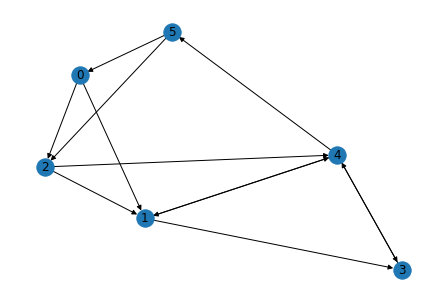

<Figure size 432x288 with 0 Axes>

In [17]:
N = 6
G = nx.DiGraph()
a = [(i, j) for i in range(N) for j in pos[i]] # генерация списка рёбер

G.add_nodes_from(range(N))
G.add_edges_from(a)

nx.draw(G,with_labels=True)

pylab.figure ()
plt.show()

Определим с помощью поиска в ширину кратчайший маршрут:

In [18]:
level, parents = bfs(pos, 0, out=0)

In [19]:
path = PATH(5, parents)
print(path)

[0, 1, 4, 5]


Рассмотрите возможность распаралеливания этого алгоритма и напишите соответстствующую программу:

# Домашнее задание (базовое):

# Задание 1. Скалярное произведение векторов.

Напишите программу реализующую каскадное скалярное произведение векторов.

# Задание 2. Произведение матриц.

Напишите программу разделяющую матрицы ни подматрицы, осуществляющую паралельное перемножение матриц и объединяющую результаты в одну матрицу.

# Задание 3. Алгоритм Флойда.

Одной из основных задач теории графов является поиск всех кратчайших путей в ориентированном взвешанном графе. Её можно решить с помощью алгоритма Флойда. 

Пусть задан ориентированный взвешанный граф:

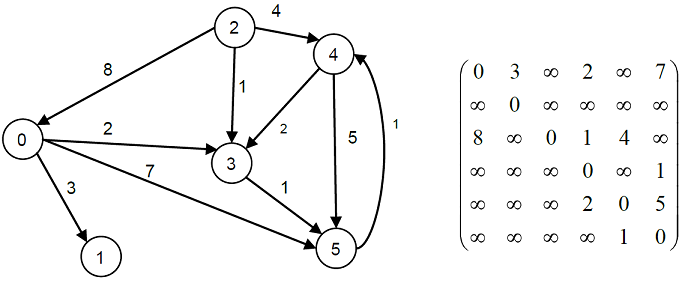

In [18]:
# Так можно добавлять картинки

from IPython.display import Image         # вызов из библиотеки определённой функции
Image("Алгоритм Флойда.png")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [ ]:
google = 9999999999
A = 

In [19]:
def Floid(A, n):
    F = A.copy()
    for k in range(n): 
        for i in range(n): 
            for j in range(n): 
                A[i,j] = min(A[i,j],A[i,k]+A[k,j])
    return F

Проанализируйте возможность распаралеливания этого алгаритма и напишите соответствующую программу, оценити сокращение времени работы.